In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from tensorflow.keras import datasets, layers, models
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape,y_train.shape,X_test.shape,y_test.shape
y_train = y_train.reshape(-1,)
X_train[2].shape

(32, 32, 3)

In [ ]:
y_train.shape

(50000,)

array([[[ 28,  25,  10],
        [ 37,  34,  19],
        [ 38,  35,  20],
        ...,
        [ 76,  67,  39],
        [ 81,  72,  43],
        [ 85,  76,  47]],

       [[ 33,  28,  13],
        [ 34,  30,  14],
        [ 32,  27,  12],
        ...,
        [ 95,  82,  55],
        [ 96,  82,  56],
        [ 85,  72,  45]],

       [[ 39,  32,  15],
        [ 40,  33,  17],
        [ 57,  50,  33],
        ...,
        [ 93,  76,  52],
        [107,  89,  66],
        [ 95,  77,  54]],

       ...,

       [[ 83,  73,  52],
        [ 87,  77,  56],
        [ 84,  74,  52],
        ...,
        [ 99,  93,  70],
        [ 90,  84,  61],
        [ 81,  75,  52]],

       [[ 88,  72,  51],
        [ 90,  74,  52],
        [ 93,  77,  56],
        ...,
        [ 80,  74,  53],
        [ 76,  70,  49],
        [ 82,  76,  55]],

       [[ 97,  78,  56],
        [ 94,  75,  53],
        [ 93,  75,  53],
        ...,
        [ 54,  47,  28],
        [ 63,  56,  37],
        [ 72,  65,  46]]], dtype=uint8)
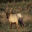

In [ ]:
X_train[3]

In [ ]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
y_train[:9]

array([6, 9, 9, 4, 1, 1, 2, 7, 8], dtype=uint8)

In [ ]:
def plot_sample(X,y,index):
  plt.figure(figsize = (12,2))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

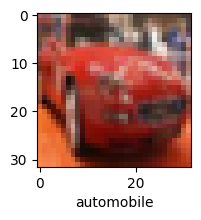

In [ ]:
plot_sample(X_train,y_train,5)

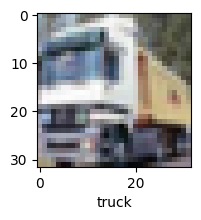

In [ ]:
plot_sample(X_train,y_train,1)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(2000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(500,activation='sigmoid'),

])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
ann.fit(X_train,y_train,epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.2673 - loss: 2.1631
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.3949 - loss: 1.7075
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 139s 52ms/step - accuracy: 0.4316 - loss: 1.5996
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 52ms/step - accuracy: 0.4483 - loss: 1.5391
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 53ms/step - accuracy: 0.4644 - loss: 1.4889


In [ ]:
ann.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.4396 - loss: 1.5029


[1.502581000328064, 0.43849998712539673]

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred= ann.predict(X_test)
y_pred_classes= [np.argmax(element) for element in y_pred]
print("/n Classification report: \n", classification_report(y_test,y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 24ms/step
/n Classification report: 
               precision    recall  f1-score   support

           0       0.49      0.55      0.51      1000
           1       0.45      0.75      0.57      1000
           2       0.34      0.32      0.33      1000
           3       0.30      0.48      0.37      1000
           4       0.36      0.50      0.42      1000
           5       0.31      0.18      0.23      1000
           6       0.58      0.34      0.43      1000
           7       0.70      0.36      0.48      1000
           8       0.52      0.64      0.57      1000
           9       0.64      0.27      0.38      1000

    accuracy                           0.44     10000
   macro avg       0.47      0.44      0.43     10000
weighted avg       0.47      0.44      0.43     10000



In [ ]:
cnn = models.Sequential([

    layers.Conv2D(2,(3,3),activation = 'relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(32,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(100,activation='relu'),
    layers.Dense(10,activation='softmax'),

])

In [ ]:
cnn.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
cnn.fit(X_train,y_train,epochs = 15)


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.1620 - loss: 2.2317
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.2886 - loss: 1.9507
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.3756 - loss: 1.7360
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4140 - loss: 1.6321
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.4446 - loss: 1.5542
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.4634 - loss: 1.4917
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.4911 - loss: 1.4383
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5055 - loss: 1.3979
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5245 - loss: 1.3525
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.5366 - loss: 1.3137
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5510 - loss: 1.2727
Epoch 12

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5714 - loss: 1.2375


[1.2449238300323486, 0.5692999958992004]

In [ ]:
y_test= y_test.reshape(-1,)
y_test[:5]
#8 ship

array([3, 8, 8, 0, 6], dtype=uint8)

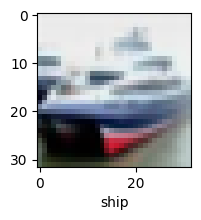

In [ ]:
plot_sample(X_test,y_test,1)

In [ ]:
#predicting
y_pred = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [ ]:
np.argmax([y_pred[0]])

np.int64(3)

In [ ]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5] #predicted first 5

[np.int64(3), np.int64(0), np.int64(8), np.int64(0), np.int64(4)]

In [ ]:
y_test[:5] #tested first 5

array([3, 8, 8, 0, 6], dtype=uint8)

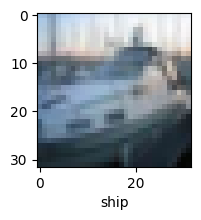

In [ ]:
plot_sample(X_test,y_test,2)
#actual value

In [ ]:
classes[y_classes[2]]
#predicted value

'ship'

In [ ]:
print("/n Classification report: \n", classification_report(y_test,y_classes))

/n Classification report: 
               precision    recall  f1-score   support

           0       0.57      0.72      0.64      1000
           1       0.66      0.67      0.66      1000
           2       0.50      0.41      0.45      1000
           3       0.41      0.36      0.38      1000
           4       0.47      0.59      0.52      1000
           5       0.57      0.41      0.47      1000
           6       0.79      0.53      0.63      1000
           7       0.58      0.67      0.62      1000
           8       0.61      0.72      0.66      1000
           9       0.59      0.62      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000



In [ ]:
y_pred[0:5].shape

(5, 10)

In [ ]:
a = [np.argmax(i) for i in y_pred[10:15]]

In [ ]:
a

[np.int64(0), np.int64(9), np.int64(7), np.int64(7), np.int64(9)]

In [ ]:
y_test[10:15]

array([0, 9, 5, 7, 9], dtype=uint8)

In [ ]:
classes[a[3]]

'horse'

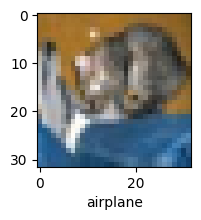

In [ ]:
plot_sample(X_test,a,0)

Text(0.5, 0, 'airplane')

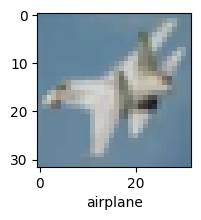

In [ ]:
plt.figure(figsize = (12,2))
plt.imshow(X_test[10])
plt.xlabel(classes[a[0]])